In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Read the data

In [2]:
data = pd.read_csv('../datasets/pima_indians_diabetes.csv')

In [3]:
data.head(2)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Split the data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = data.iloc[:,:8]
y = data.iloc[:,8]

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

## Classification

### Hyperparameter tuning

#### Use GridSearch to find the right hyperparameter values

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [9]:
pgrid = [
    {
        'kernel':['rbf'],
        'gamma':[0.5,0.1,0.01],
        'C':[10,0.1,0.001,0.0001]
    }
]

In [10]:
model = SVC()

In [11]:
grid = GridSearchCV(model,param_grid=pgrid, cv=10)

In [12]:
grid.fit(X,y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.01], 'kernel': ['rbf']}])

In [13]:
grid.best_params_

{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}

#### Build the model

In [14]:
model = SVC(C=10,gamma=0.5,probability=True)

## Find Best values of C and gamma through iteration

In [15]:
model.fit(X_train,y_train)

SVC(C=10, gamma=0.5, probability=True)

#### Make predictions for training data and calculate the metrics

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_auc_score, roc_curve

In [17]:
yhat_train = model.predict(X_train)

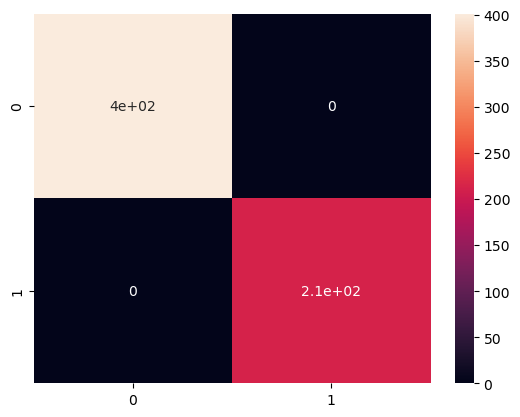

In [18]:
cm = confusion_matrix(y_train, yhat_train)
sns.heatmap(cm, annot=True)
plt.show()

In [19]:
print(classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



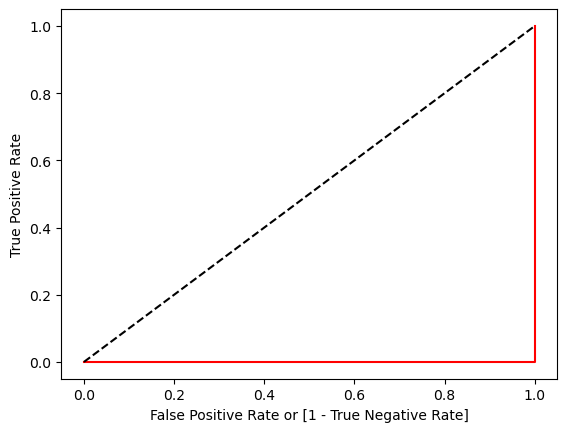

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train, yhat_train)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

#### Make predictions for testing data and calculate the metrics

In [21]:
yhat_test = model.predict(X_test)

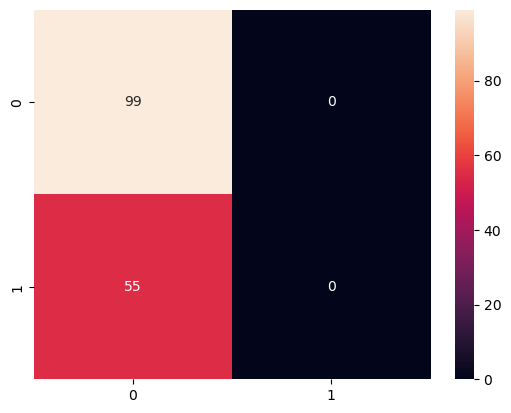

In [22]:
cm = confusion_matrix(y_test, yhat_test)
sns.heatmap(cm, annot=True)
plt.show()

In [23]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154



C:\Users\radha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


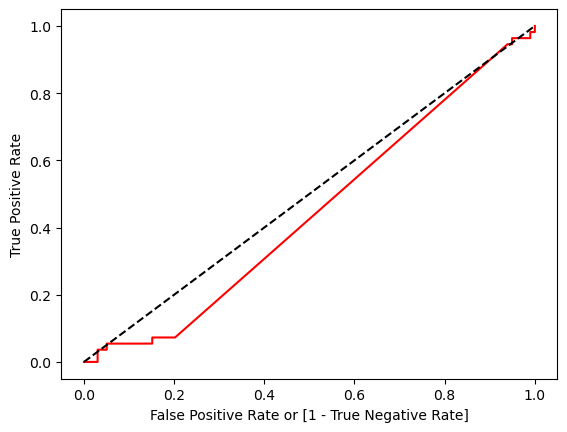

In [24]:
###### from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba (X_test)[:,1])

auc = roc_auc_score(y_test, yhat_test)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()